<a href="https://colab.research.google.com/github/nastyalolpro/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [17]:
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv'
mydata = pd.read_csv(url)
print(mydata.shape)
mydata.head()

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
1827,54837,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Designer;Full-stack developer,15-17 years,9-11 years,117561.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Java;Perl;SQL;HTML;CSS,Male,25 - 34 years old,White or of European descent
2613,78216,"Yes, part-time",Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;De...,9-11 years,3-5 years,47797.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Immediately after graduating,Java;SQL,Male,25 - 34 years old,Black or of African descent
255,8011,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Designer;Desktop or enterpr...,21-23 years,21-23 years,95968.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,C#;Java;JavaScript;HTML;CSS;Bash/Shell,Male,45 - 54 years old,White or of European descent
767,22611,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer,30 or more years,21-23 years,116268.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C++;Go;Java;Python;SQL;HTML;CSS;Bash/Shell,Male,45 - 54 years old,White or of European descent
483,14278,"Yes, full-time",Employed part-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;St...,3-5 years,0-2 years,3600.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS;Ba...,Male,18 - 24 years old,East Asian


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [9]:
sample_20 = mydata.sample(20, random_state=42)
sample_200 = mydata.sample(200, random_state=42)

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [12]:
mean_20 = sample_20['ConvertedSalary'].mean()
mean_200 = sample_200['ConvertedSalary'].mean()
print(mean_20)
mean_200

55752.2


68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [24]:
def conf_int(data, conf=.95):

  mydata = np.array(data)
  mean = np.mean(mydata)
  n = len(mydata)
  std_err = np.std(mydata, ddof=1)/np.sqrt(n)
  margin_of_err = std_err * stats.t.ppf((1+conf)/2, n-1)

  return(mean, margin_of_err, mean-margin_of_err, mean+margin_of_err)


In [42]:
bottom_margin = conf_int(sample_20['ConvertedSalary'])[2]
top_margin = conf_int(sample_20['ConvertedSalary'])[3]
print(bottom_margin)
top_margin

35805.10309625536


75699.29690374463

In [41]:
CI_width_20 = top_margin - bottom_margin
CI_width_20

39894.19380748927

In [38]:
bottom_margin_200 = conf_int(sample_200['ConvertedSalary'])[2]
top_margin_200 = conf_int(sample_200['ConvertedSalary'])[3]
print(bottom_margin_200)
top_margin_200

60593.058804479086


76509.45119552092

In [43]:
CI_width_200 = top_margin_200 - bottom_margin_200
CI_width_200

15916.39239104183

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [48]:
print(conf_int(sample_20['ConvertedSalary'])[0])
conf_int(sample_20['ConvertedSalary'])[1]

55752.2


19947.096903744638

In [49]:
print(conf_int(sample_200['ConvertedSalary'])[0])
conf_int(sample_200['ConvertedSalary'])[1]

68551.255


7958.196195520917

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

<ErrorbarContainer object of 3 artists>

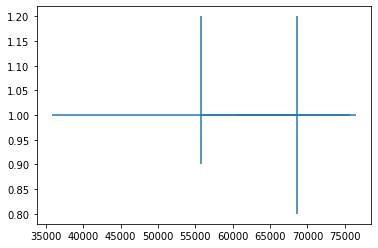

In [78]:
x =  [conf_int(sample_20['ConvertedSalary'])[0], conf_int(sample_200['ConvertedSalary'])[0]]
y = [1,1]
x_error = [19947.096903744638, 7958.196195520917]
plt.errorbar(x, y, yerr = y_error, 
             xerr = x_error)

ValueError: ignored

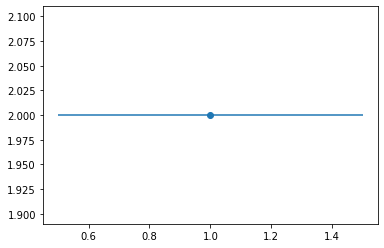

In [70]:
x =[1] 
y =[2] 
  
# creating error 
y_errormin =[0.1, 0.2] 
y_errormax =[0.2, 0.2] 
  
x_error = 0.5
y_error =[y_errormin, y_errormax] 
  
# ploting graph 
# plt.plot(x, y) 
plt.errorbar(x, y, 
             yerr = y_error, 
             xerr = x_error,  
             fmt ='o')

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [79]:
conf_int(mydata['ConvertedSalary'])

(73453.40420137631, 2153.574339128457, 71299.82986224785, 75606.97854050477)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.